In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("D:/New folder/Python/StudentsPerformance.csv")

#### DATA EXPLORATION

In [2]:
df.shape

(1000, 8)

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### DATA VISUALIZATION

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

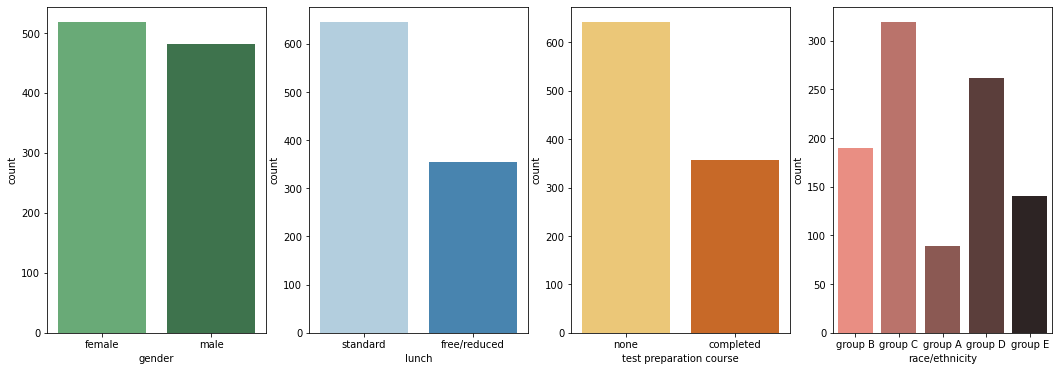

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
sns.countplot(ax=axes[0],x='gender',data=df,palette='Greens_d')
sns.countplot(ax=axes[1],x='lunch',data=df,palette='Blues')
sns.countplot(ax=axes[2],x='test preparation course',data=df,palette='YlOrBr')
sns.countplot(ax=axes[3],x='race/ethnicity',data=df,palette='dark:salmon_r')

##### These graphs show the distribution of different subcategories across each categorical variable.

<AxesSubplot:xlabel='writing score', ylabel='Count'>

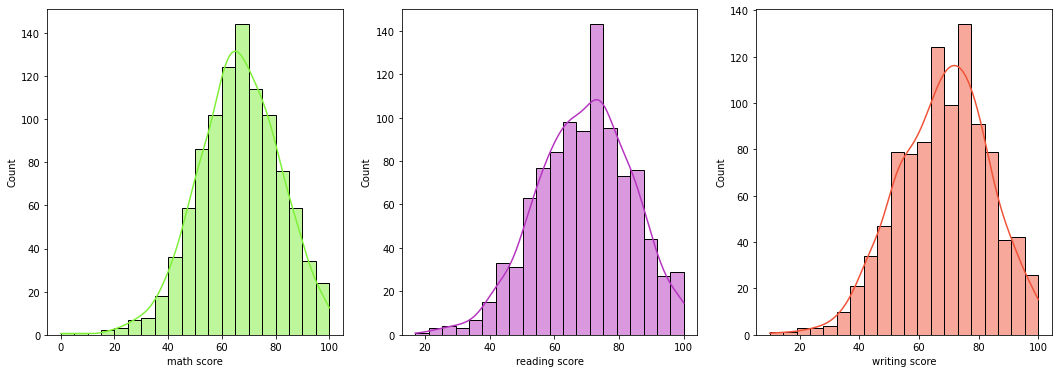

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(ax=axes[0],x='math score',data =df,bins=20,kde=True,color='#7FF038')
sns.histplot(ax=axes[1],x='reading score',data =df,bins=20,kde=True,color='#B635C0')
sns.histplot(ax=axes[2],x='writing score',data =df,bins=20,kde=True,color='#F05338')

These histograms are left skewed indicating that the mean score is less than the median score. This is the case because skewed towards left data have a few small values that drive the mean downward but do not affect where the exact middle of the data is (that is, the median).

I used color codes from https://htmlcolorcodes.com/color-picker/ .

<AxesSubplot:xlabel='writing score', ylabel='reading score'>

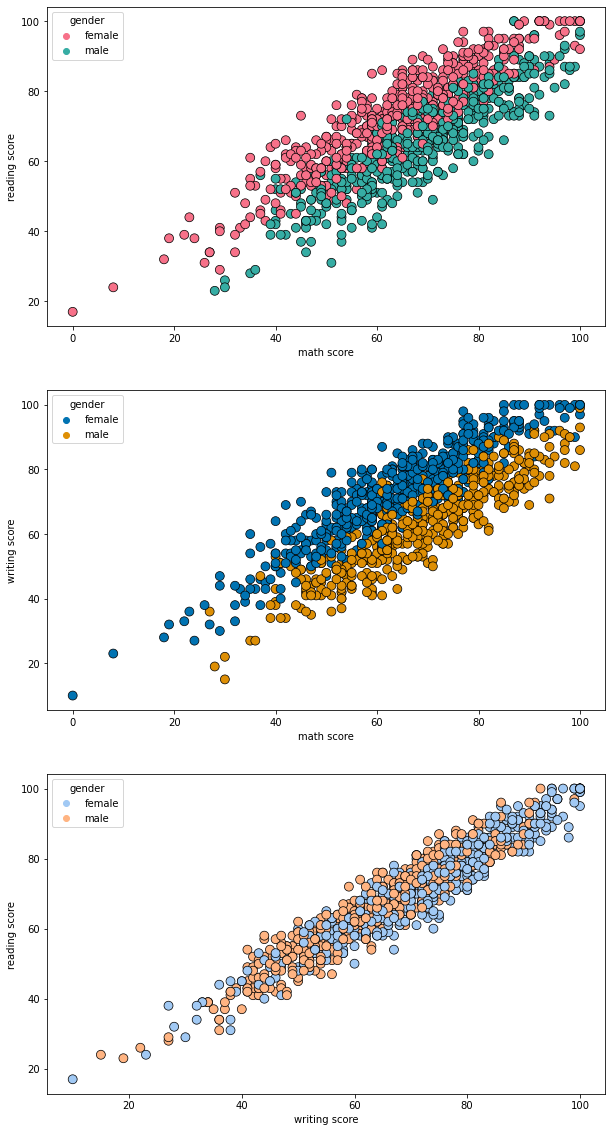

In [8]:
#scatterplots
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
sns.scatterplot(ax=axes[0],x='math score',y='reading score',data =df,hue='gender',edgecolor='black',s=80,palette='husl')
sns.scatterplot(ax=axes[1],x='math score',y='writing score',data =df,hue='gender',edgecolor='black',s=80,palette='colorblind')
sns.scatterplot(ax=axes[2],x='writing score',y='reading score',data =df,hue='gender',edgecolor='black',s=80,palette='pastel')

Students' scores in reading vs writing are more linear than students' scores in maths vs (reading & writing). Students' scores in maths vs (reading and writing) are bit spread out but still they somehow manage to follow a trend that is if a student scores more in maths she/he will also generally score more in reading & writing.

In [9]:
#To know the effect of test preparation course & parental education level on total score
df['Total score'] = (df['math score'] + df['writing score'] + df['reading score'])
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


<AxesSubplot:xlabel='test preparation course', ylabel='Total score'>

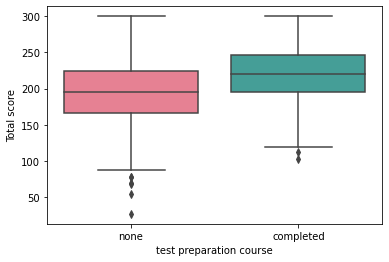

In [10]:
sns.boxplot(x='test preparation course',y='Total score',data=df,palette='husl')

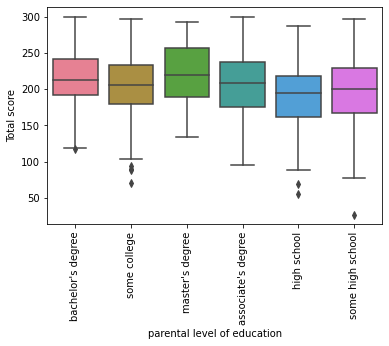

In [11]:
sns.boxplot(x='parental level of education',y='Total score',data=df,palette='husl')
plt.xticks(rotation=90)
plt.show()

#### It's clearly visible that :
* Students who completed test preparation course performed better than others.
* Students with master's degree of parental level of education performed better than others.

### THANK YOU!